# Project Churn



## Imports

In [1]:
#My wrangle imports
import acquire as acq
import prepare as prep
import exp_telco_churn as prep_tel
import auto_model2 as atm
import os



## Acquire

* I downloaded from the company sql server (April 25, 2023), saved a local copy of it as a csv file, and saved the data in a dataframe called customers.  
* There are 7,043 rows each representing a unique customer. 
* There are 24 columns containing a range of Telco customer data.

In [2]:
# These are the variables necessary for the acquire functions to work.
sql_query = "select * from customers \
        join contract_types using (contract_type_id) \
        join internet_service_types using (internet_service_type_id) \
        join payment_types using (payment_type_id)"
directory = os.getcwd()
url_for_query = acq.get_db_url("telco_churn")
filename = "customers.csv"

customers = acq.get_sql_data(sql_query, directory, url_for_query, filename) #This function pulls back the churn data and saves it as a csv and a dataframe. 
#Note: This does require your own env file containing your credentials in order for the function to work.  

## Prepare

* I removed duplicate columns and encoded and dummied columns containing objects.
* Total charges were converted from an object to a float.
* Total charges contained nulls. Those were replaced with zeros as the nulls represented the fact that some customers had not been charged yet.
* The data was split into xxxx train, validate, and test segments. 

In [3]:
# These functions prep the data for exploration
customers = prep.prep_telco(customers) #this function is for removing duplicates, dummifying that data, and changing total_charges to a float type
customers_train, customers_validate, customers_test = prep.split_function(customers, 'churn') #This splits off the data into train, validate, and test groups



## Explore
# General Methodology 
* I started by first comparing each categorical feature and each continuous value feature with churn along with the appropriate statistical tests.
* I then formulated the following questions from my initial analysis focusing on the features the seemed to be disproportionately related to churn rate.. 

# Exploration Questions
* Is there any significant correlation between payment type and churn?
* What is going on with the fiber optic customers? Specifically what factors surround the churn in fiber customers. Is it just that it is the most popular or is it related to lack of services?
* Do add on services (security, back up, streaming, tech support, device protection) relate to churn in a significant way?
* Do social demographics play a role in churn (senior citizens, single, children) churn?



PAPERLESS_BILLING
Yes    4171
No     2872
Name: paperless_billing, dtype: int64
Yes    0.592219
No     0.407781
Name: paperless_billing, dtype: float64


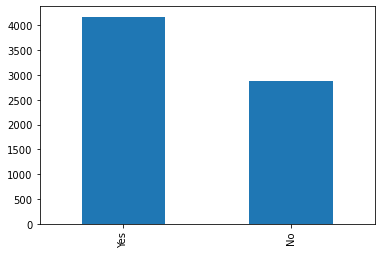



HYPOTHESIZE
H_0: paperless billing does not affect churned
H_a: paperless billing affects churned

VISUALIZE


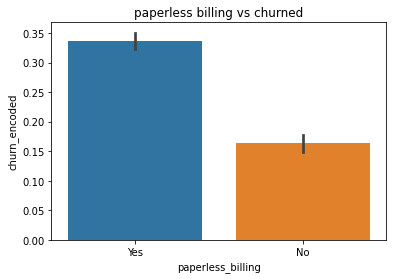


ANALYZE and SUMMARIZE
Observed
[[2403  469]
 [2771 1400]]

Expected
[[2109  762]
 [3064 1106]]

----
chi^2 = 258.2776
p-value = 0.0000
----
We reject the null hypothesis.



CONTRACT_TYPE
Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: contract_type, dtype: float64


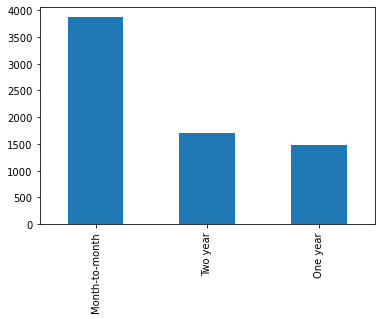



HYPOTHESIZE
H_0: contract type does not affect churned
H_a: contract type affects churned

VISUALIZE


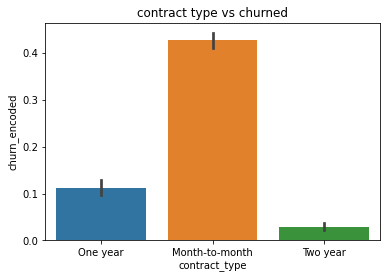


ANALYZE and SUMMARIZE
Observed
[[2220 1655]
 [1307  166]
 [1647   48]]

Expected
[[2846 1028]
 [1082  390]
 [1245  449]]

----
chi^2 = 1184.5966
p-value = 0.0000
----
We reject the null hypothesis.




In [4]:
#This calls  a loop that runs through the columns I want plotted vs. churn with chi2 stat test. 
col_cat = ["paperless_billing", "contract_type"]
prep_tel.cat_graph_loop(customers, col_cat, "churned", "churn_encoded")  

## Question: 

Is there any significant correlation between payment type and churn? 

No. While there is a statistical correlation between payment type and churn it appears to be more or less inline with what we would expect to see given the large number of electronic billing customers. Same goes for month-to-month contract type. In other words there is a correlation but not revealing.


INTERNET_SERVICE_TYPE
Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64
Fiber optic    0.439585
DSL            0.343746
None           0.216669
Name: internet_service_type, dtype: float64


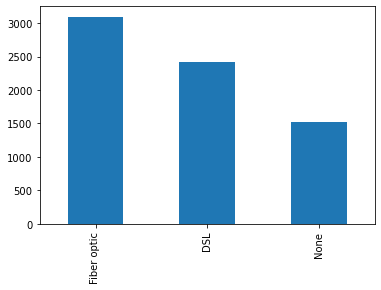



HYPOTHESIZE
H_0: internet service type does not affect churned
H_a: internet service type affects churned

VISUALIZE


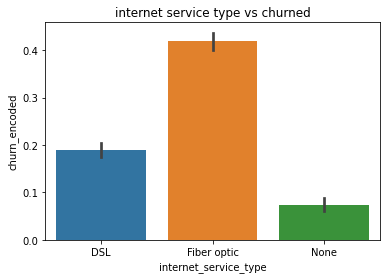


ANALYZE and SUMMARIZE
Observed
[[1962  459]
 [1799 1297]
 [1413  113]]

Expected
[[1778  642]
 [2274  821]
 [1121  404]]

----
chi^2 = 732.3096
p-value = 0.0000
----
We reject the null hypothesis.



TECH_SUPPORT
No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: tech_support, dtype: float64


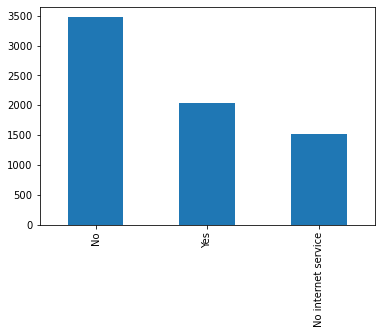



HYPOTHESIZE
H_0: tech support does not affect churned
H_a: tech support affects churned

VISUALIZE


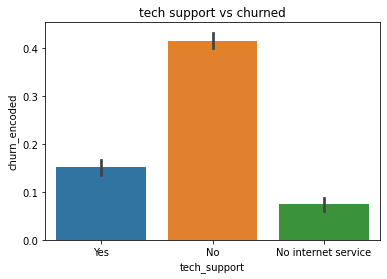


ANALYZE and SUMMARIZE
Observed
[[2027 1446]
 [1413  113]
 [1734  310]]

Expected
[[2551  921]
 [1121  404]
 [1501  542]]

----
chi^2 = 828.1971
p-value = 0.0000
----
We reject the null hypothesis.



DEVICE_PROTECTION
No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: device_protection, dtype: float64


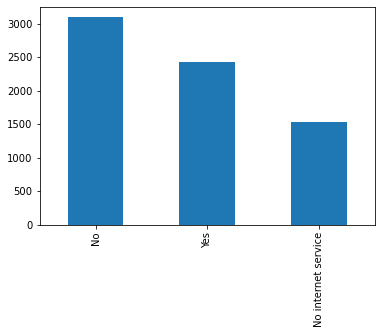



HYPOTHESIZE
H_0: device protection does not affect churned
H_a: device protection affects churned

VISUALIZE


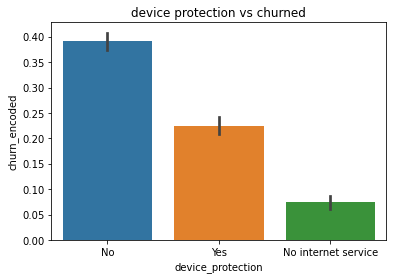


ANALYZE and SUMMARIZE
Observed
[[1884 1211]
 [1413  113]
 [1877  545]]

Expected
[[2273  821]
 [1121  404]
 [1779  642]]

----
chi^2 = 558.4194
p-value = 0.0000
----
We reject the null hypothesis.



ONLINE_BACKUP
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: online_backup, dtype: float64


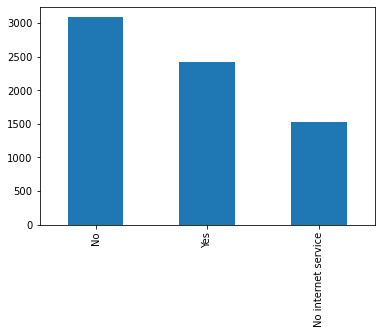



HYPOTHESIZE
H_0: online backup does not affect churned
H_a: online backup affects churned

VISUALIZE


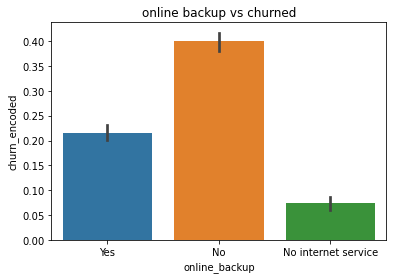


ANALYZE and SUMMARIZE
Observed
[[1855 1233]
 [1413  113]
 [1906  523]]

Expected
[[2268  819]
 [1121  404]
 [1784  644]]

----
chi^2 = 601.8128
p-value = 0.0000
----
We reject the null hypothesis.



SENIOR_CITIZEN
0    5901
1    1142
Name: senior_citizen, dtype: int64
0    0.837853
1    0.162147
Name: senior_citizen, dtype: float64


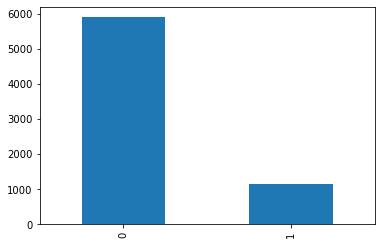



HYPOTHESIZE
H_0: senior citizen does not affect churned
H_a: senior citizen affects churned

VISUALIZE


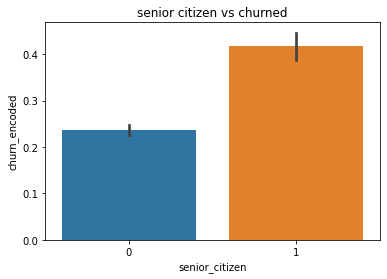


ANALYZE and SUMMARIZE
Observed
[[4508 1393]
 [ 666  476]]

Expected
[[4335 1565]
 [ 838  303]]

----
chi^2 = 159.4263
p-value = 0.0000
----
We reject the null hypothesis.




In [5]:
#This calls  a loop that runs through the columns I want plotted vs. churn with chi2 stat test. 
col_cat = ["internet_service_type","tech_support" , "device_protection" , "online_backup","senior_citizen"]
prep_tel.cat_graph_loop(customers, col_cat, "churned", "churn_encoded")  

## Question: 
What is going on with the fiber optic customers? Specifically what factors surround the churn in fiber customers. Is it just that it is the most popular or is it related to lack of services? 

With fiber being our most popular internet service type all things being equal we should see about a proportional amount of churn from the category, but we see relatively more. When examined this appears to be due to lack of add on services and not due to the lack of interest in using the high speed service in general as those churned used it to stream movies and shows just as much as those that didn’t.

## Question:
Do add on services (security, back up, streaming, tech support, device protection) relate to churn? 

Yes. This seems to affect every category it was compared to. 

## Question:
Do social demographics play a role in churn (senior citizens, single, children) churn? 

Being a senior citizen does increase the likelihood of churn. Being single and without dependents does appear to correlate to churn but the connection is unclear.


## Exploration Summary and Moving Toward Modeling

Tenure, costs, contract type, and other features do correlate with churn but alone are not the significant drivers of churn. No one would leave if the services were free. With that said, add on services, internet service type, senior citizen status are features that are significantly correlated with driving churn. Other features like tenure and cost play a role and were used in modeling as well. 

# Modeling

### Introduction

I ran through several configurations of features (concentrating on my selected features) and models and settled on using the random forest model as it provided the highest accuracy. The baseline of 73% was beat, with an overall accuracy of 83% on the test set.  


## The Three Best Models
They all beat the baseline of 73%


------------------------ Train Model with depth of 4 ------------------------------


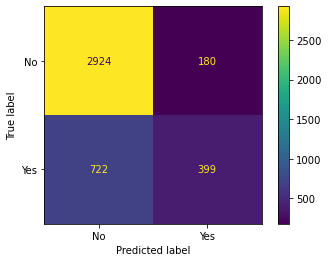

                    No          Yes  accuracy    macro avg  weighted avg
precision     0.801975     0.689119  0.786509     0.745547      0.772031
recall        0.942010     0.355932  0.786509     0.648971      0.786509
f1-score      0.866370     0.469412  0.786509     0.667891      0.761047
support    3104.000000  1121.000000  0.786509  4225.000000   4225.000000
------------ Metrics ----------
                metric        score
0             accuracy     0.786509
1   true_positive_rate     0.355932
2  false_positive_rate     0.057990
3   true_negative_rate     0.942010
4  false_negative_rate     0.644068
5            precision     0.689119
6               recall     0.355932
7             f1_score     0.469412
8          support_pos  1121.000000
9          support_neg  3104.000000

---------------------Validate Model with depth of 4---------------------------------


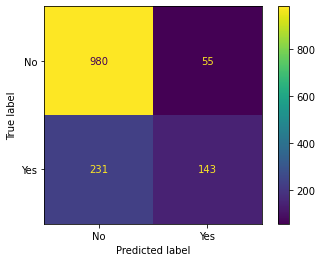

                    No          Yes  accuracy    macro avg  weighted avg
precision     0.801975     0.689119  0.786509     0.745547      0.772031
recall        0.942010     0.355932  0.786509     0.648971      0.786509
f1-score      0.866370     0.469412  0.786509     0.667891      0.761047
support    3104.000000  1121.000000  0.786509  4225.000000   4225.000000
------------ Metrics ----------
                metric        score
0             accuracy     0.797019
1   true_positive_rate     0.382353
2  false_positive_rate     0.053140
3   true_negative_rate     0.946860
4  false_negative_rate     0.617647
5            precision     0.722222
6               recall     0.382353
7             f1_score     0.500000
8          support_pos   374.000000
9          support_neg  1035.000000

depth = 4 accuracy = (0.786508875739645, 0.7970191625266146)

------------------------ Train Model with depth of 5 ------------------------------


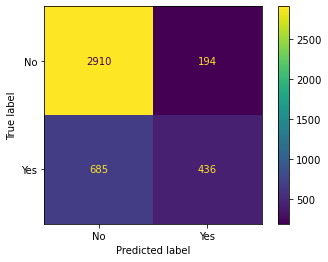

                    No          Yes  accuracy    macro avg  weighted avg
precision     0.809458     0.692063  0.791953     0.750761      0.778310
recall        0.937500     0.388938  0.791953     0.663219      0.791953
f1-score      0.868786     0.498001  0.791953     0.683394      0.770408
support    3104.000000  1121.000000  0.791953  4225.000000   4225.000000
------------ Metrics ----------
                metric        score
0             accuracy     0.791953
1   true_positive_rate     0.388938
2  false_positive_rate     0.062500
3   true_negative_rate     0.937500
4  false_negative_rate     0.611062
5            precision     0.692063
6               recall     0.388938
7             f1_score     0.498001
8          support_pos  1121.000000
9          support_neg  3104.000000

---------------------Validate Model with depth of 5---------------------------------


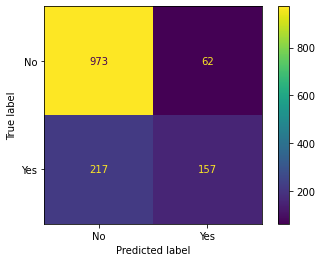

                    No          Yes  accuracy    macro avg  weighted avg
precision     0.809458     0.692063  0.791953     0.750761      0.778310
recall        0.937500     0.388938  0.791953     0.663219      0.791953
f1-score      0.868786     0.498001  0.791953     0.683394      0.770408
support    3104.000000  1121.000000  0.791953  4225.000000   4225.000000
------------ Metrics ----------
                metric        score
0             accuracy     0.801987
1   true_positive_rate     0.419786
2  false_positive_rate     0.059903
3   true_negative_rate     0.940097
4  false_negative_rate     0.580214
5            precision     0.716895
6               recall     0.419786
7             f1_score     0.529511
8          support_pos   374.000000
9          support_neg  1035.000000

depth = 5 accuracy = (0.7919526627218935, 0.8019872249822569)

------------------------ Train Model with depth of 6 ------------------------------


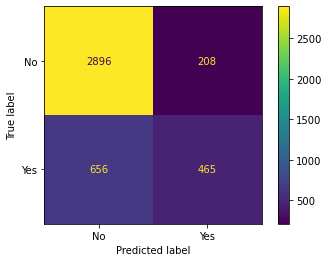

                    No          Yes  accuracy    macro avg  weighted avg
precision     0.815315     0.690936  0.795503     0.753126      0.782314
recall        0.932990     0.414808  0.795503     0.673899      0.795503
f1-score      0.870192     0.518395  0.795503     0.694293      0.776851
support    3104.000000  1121.000000  0.795503  4225.000000   4225.000000
------------ Metrics ----------
                metric        score
0             accuracy     0.795503
1   true_positive_rate     0.414808
2  false_positive_rate     0.067010
3   true_negative_rate     0.932990
4  false_negative_rate     0.585192
5            precision     0.690936
6               recall     0.414808
7             f1_score     0.518395
8          support_pos  1121.000000
9          support_neg  3104.000000

---------------------Validate Model with depth of 6---------------------------------


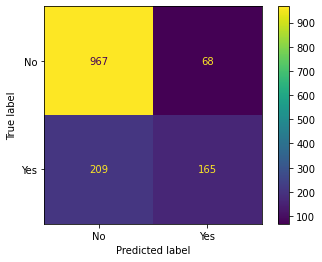

                    No          Yes  accuracy    macro avg  weighted avg
precision     0.815315     0.690936  0.795503     0.753126      0.782314
recall        0.932990     0.414808  0.795503     0.673899      0.795503
f1-score      0.870192     0.518395  0.795503     0.694293      0.776851
support    3104.000000  1121.000000  0.795503  4225.000000   4225.000000
------------ Metrics ----------
                metric        score
0             accuracy     0.803407
1   true_positive_rate     0.441176
2  false_positive_rate     0.065700
3   true_negative_rate     0.934300
4  false_negative_rate     0.558824
5            precision     0.708155
6               recall     0.441176
7             f1_score     0.543657
8          support_pos   374.000000
9          support_neg  1035.000000

depth = 6 accuracy = (0.7955029585798816, 0.8034066713981547)


In [6]:
#sets the veriables to run the random forest model on 
target = "churn" 
x_train = customers_train[["tech_support_Yes","tenure","device_protection_Yes","online_backup_Yes","senior_citizen","internet_service_type_Fiber optic"]]
x_validate = customers_validate[["tech_support_Yes","tenure","device_protection_Yes","online_backup_Yes","senior_citizen","internet_service_type_Fiber optic"]]
x_test = customers_test[["tech_support_Yes","tenure","device_protection_Yes","online_backup_Yes","senior_citizen","internet_service_type_Fiber optic"]]
y_train = customers_train[target]
y_validate = customers_validate[target]
y_test = customers_test[target]

max_depth_range = [4,5,6]

atm.auto_random_trees(x_train, y_train, x_validate, y_validate, max_depth_range) #calls a loop that pulls back the model with metrics

## You may use this as a template for how to introduce your models:

### The best Model: random forest with a depth of 6
-This random forest model had the best overall accuracy 


------------------------ Train Model with depth of 6 ------------------------------


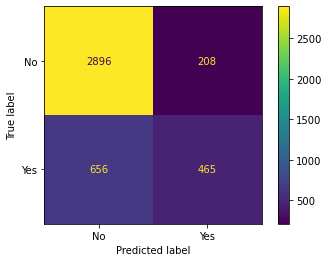

                    No          Yes  accuracy    macro avg  weighted avg
precision     0.815315     0.690936  0.795503     0.753126      0.782314
recall        0.932990     0.414808  0.795503     0.673899      0.795503
f1-score      0.870192     0.518395  0.795503     0.694293      0.776851
support    3104.000000  1121.000000  0.795503  4225.000000   4225.000000
------------ Metrics ----------
                metric        score
0             accuracy     0.795503
1   true_positive_rate     0.414808
2  false_positive_rate     0.067010
3   true_negative_rate     0.932990
4  false_negative_rate     0.585192
5            precision     0.690936
6               recall     0.414808
7             f1_score     0.518395
8          support_pos  1121.000000
9          support_neg  3104.000000

---------------------Validate Model with depth of 6---------------------------------


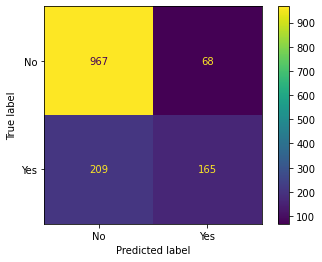

                    No          Yes  accuracy    macro avg  weighted avg
precision     0.815315     0.690936  0.795503     0.753126      0.782314
recall        0.932990     0.414808  0.795503     0.673899      0.795503
f1-score      0.870192     0.518395  0.795503     0.694293      0.776851
support    3104.000000  1121.000000  0.795503  4225.000000   4225.000000
------------ Metrics ----------
                metric        score
0             accuracy     0.803407
1   true_positive_rate     0.441176
2  false_positive_rate     0.065700
3   true_negative_rate     0.934300
4  false_negative_rate     0.558824
5            precision     0.708155
6               recall     0.441176
7             f1_score     0.543657
8          support_pos   374.000000
9          support_neg  1035.000000

depth = 6 accuracy = (0.7955029585798816, 0.8034066713981547)


In [7]:
#sets the veriables to run the random forest model on 
target = "churn" 
x_train = customers_train[["tech_support_Yes","tenure","device_protection_Yes","online_backup_Yes","senior_citizen","internet_service_type_Fiber optic"]]
x_validate = customers_validate[["tech_support_Yes","tenure","device_protection_Yes","online_backup_Yes","senior_citizen","internet_service_type_Fiber optic"]]
x_test = customers_test[["tech_support_Yes","tenure","device_protection_Yes","online_backup_Yes","senior_citizen","internet_service_type_Fiber optic"]]
y_train = customers_train[target]
y_validate = customers_validate[target]
y_test = customers_test[target]

max_depth_range = [6]

atm.auto_random_trees(x_train, y_train, x_validate, y_validate, max_depth_range) #calls a loop that pulls back the model with metrics

### Test Model



------------------------ Test Model with depth of 6 ------------------------------


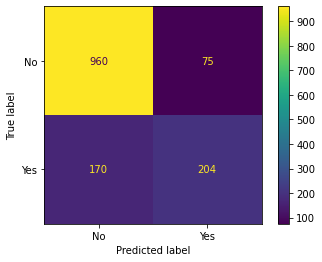

                    No         Yes  accuracy    macro avg  weighted avg
precision     0.849558    0.731183  0.826118     0.790370      0.818137
recall        0.927536    0.545455  0.826118     0.736495      0.826118
f1-score      0.886836    0.624809  0.826118     0.755822      0.817284
support    1035.000000  374.000000  0.826118  1409.000000   1409.000000
------------ Metrics ----------
                metric        score
0             accuracy     0.826118
1   true_positive_rate     0.545455
2  false_positive_rate     0.072464
3   true_negative_rate     0.927536
4  false_negative_rate     0.454545
5            precision     0.731183
6               recall     0.545455
7             f1_score     0.624809
8          support_pos   374.000000
9          support_neg  1035.000000
Accuracy is 0.8261178140525195


In [8]:
#sets the veriables to run the random forest model on 
target = "churn" 
x_train = customers_train[["tech_support_Yes","tenure","device_protection_Yes","online_backup_Yes","senior_citizen","internet_service_type_Fiber optic"]]
x_validate = customers_validate[["tech_support_Yes","tenure","device_protection_Yes","online_backup_Yes","senior_citizen","internet_service_type_Fiber optic"]]
x_test = customers_test[["tech_support_Yes","tenure","device_protection_Yes","online_backup_Yes","senior_citizen","internet_service_type_Fiber optic"]]
y_train = customers_train[target]
y_validate = customers_validate[target]
y_test = customers_test[target]
customer_id = customers_test.customer_id
max_depth_range = [6]

atm.auto_random_trees_test(x_test, y_test, max_depth_range, customer_id)

## Conclusion

### Summery
* The module I used returns predictions with an 80% overall accuracy using the "tech support, tenure, device protection, online backup, senior citizen, and internet service type features which indicates that churn is significantly correlated with these features. 


### Recommendations
* I recommend using the churn predictions to target those predicted to churn with an email, text message, and possibly phone call (if they are a senior) ad campaign offering deals bundling their current services with additional add-ons at a discount. Future customers should be enticed with long term contracts that bundle add-on service with fiber optic internet service at upfront discount that diminishes over time.  

### Next Steps
* The should gather more data on customer complaints from fiber users to ascertain what issues, if any, they are having.